## Pandas

In [4]:
#Importando as bibliotecas

import pandas as pd
import numpy as np

In [5]:
#Atribuindo a leitura do arquivo csv à variável 'df_titanic'

df_titanic = pd.read_csv('titanic.csv')

In [ ]:
#Visualizando o dataframe

df_titanic

In [ ]:
#verificando as dimensões do dataframe 
 
df_titanic.shape

In [ ]:
#Acessando os nomes das colunas do dataframe

df_titanic.columns

In [ ]:
#Acessando os tipos dos dados de cada coluna

df_titanic.dtypes

In [20]:
#Criando um backup para eventuais necessidades

df_backup = df_titanic

In [ ]:
#Acessando informações estatísticas básicas das colunas numéricas do dataframe

df_titanic.describe()

In [ ]:
#O comando .info() retorna infos das colunas do dataframe como: nome, tipos de dados e quantidade de campos não-nulos 

df_titanic.info()

In [34]:
#Atribuindo certos tratamentos de dataframe a uma função em específico
 
def processamento_df(df): 

    df = df.sort_values('Fare') #ordenando os valores do dataframe de acordo com a coluna 'Fare'
    df = df.dropna(subset='Fare') #removendo os valores nulos na coluna 'Fare'
    df = df.drop(['SibSp', 'Parch'], axis='columns') #removendo as colunas 'SibSp' e 'Parch' do dataframe
    df = df.reset_index() #resetando o index do dataframe

    metricas = df.describe() #atribuindo infos estatisticas das colunas numéricas 

    baby_df = df.sample(100) #atribuindo uma amostra aleatória do dataframe de 100 registros à variável 'baby_df'

    return baby_df, df, metricas #retornando uma amostra do df, ele agora com as tratamentos e suas métricas atuais

In [37]:
#Trazendo as variáveis para fora da função com seus devidos valores

baby_df, df_titanic, metricas = processamento_df(df_titanic)

In [ ]:
#Imprimindo a amostra de dataframe obtida na função

print('DataFrame reduzido:')
print(baby_df)

In [ ]:
#Imprimindo o dataframe pós o tratamento realizado na função

print('DataFrame tratado:')
print(df_titanic)

In [ ]:
#Imprimindo as métricas estatísticas das colunas numéricas do dataframe pós-tratamento

print('Métricas descritivas:')
print(metricas)

## Matplotlib

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Número de passageiros por classe')

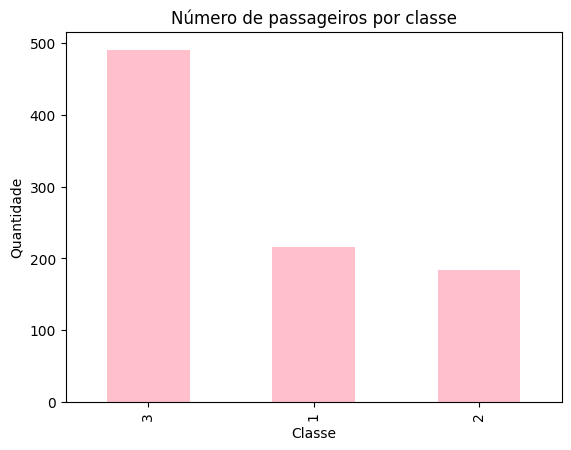

In [48]:
#Atribuindo a quantidade de passageiros de cada classe da coluna 'Pclass' à variável 'contagem_passageiros'

contagem_passageiros = df_titanic['Pclass'].value_counts()

#Plotando 
contagem_passageiros.plot(kind='bar', color='pink')

plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Número de passageiros por classe')


### Exercício durante a aula

1) Taxa de sobrevivência por sexo
2) Distribuição de idade dos sobreviventes


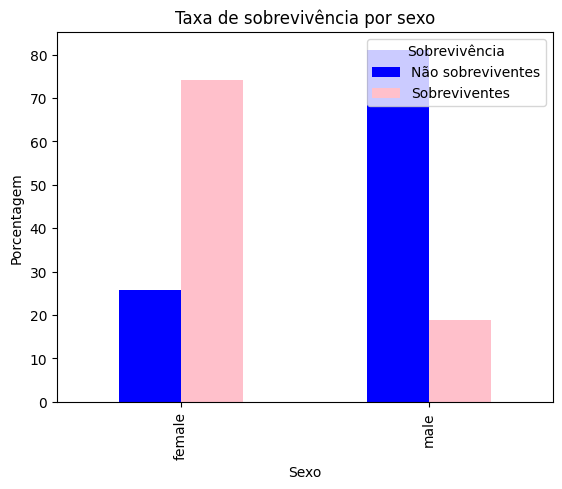

In [10]:
#Taxa de sobrevivência por sexo

taxa_sobreviventes_sexo = df_titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
taxa_sobreviventes_sexo.plot(kind='bar', color=['blue', 'pink'])
plt.title('Taxa de sobrevivência por sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')
plt.legend(['Não sobreviventes', 'Sobreviventes'], title='Sobrevivência')

Text(0, 0.5, 'Quantidade')

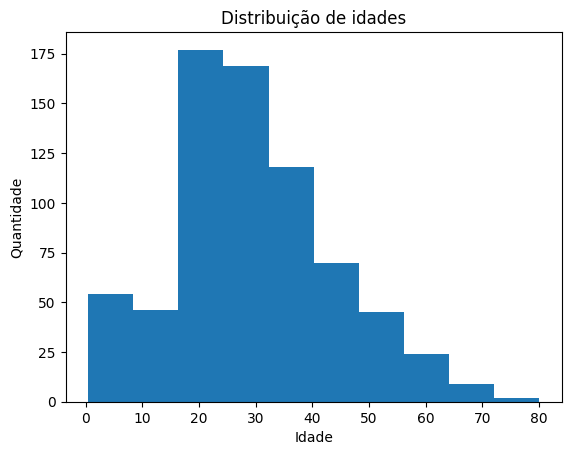

In [13]:
#Distribuição de idade dos passageiros

df_titanic['Age'].plot(kind='hist')
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')